In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

In [4]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

Current Working Directory: c:\Users\TRUPTI-PARAB\Desktop\Potato_leaf_disease_prediction


## Parameter Breakdown

### `train_path`
- **Description**: The path to the directory containing the training images.
- **Details**: This directory should have subdirectories, with each subdirectory named after a class label, containing images of that class.

---

### `labels="inferred"`
- **Description**: The labels for the images are inferred from the subdirectory names in the `train_path`.
- **Example**: If `train_path` contains subdirectories `cats` and `dogs`, labels will be assigned as `cats = 0` and `dogs = 1` (or similar).

---

### `label_mode="categorical"`
- **Description**: Specifies the type of labels.
  - `"categorical"`: Labels are returned as one-hot encoded vectors.
  - `"int"`: Labels are returned as integers.
  - `None`: No labels are returned.
- **Details**: Here, labels are one-hot encoded, useful for classification tasks.

---

### `class_names=None`
- **Description**: Automatically determines class names from the subdirectory names.
- **Details**: You can specify a list like `['cats', 'dogs']` to manually define the class names.

---

### `color_mode="rgb"`
- **Description**: Specifies the image color mode.
  - `"rgb"`: Loads 3-channel color images.
  - `"grayscale"`: Loads single-channel grayscale images.
  - `"rgba"`: Loads 4-channel color images.
- **Details**: Here, images are loaded in RGB mode.

---

### `batch_size=32`
- **Description**: The number of images to be processed in a single batch during training.
- **Details**: Affects memory usage and training speed.

---

### `image_size=(128, 128)`
- **Description**: Resizes all images to the specified dimensions (128x128 pixels in this case).
- **Details**: Helps standardize input dimensions for the neural network.

---

### `shuffle=True`
- **Description**: Randomly shuffles the images before creating batches.
- **Details**: Helps reduce overfitting and ensures a diverse input distribution.

---

### `seed=None`
- **Description**: Used to set a random seed for reproducibility of the shuffle.
- **Details**: If `None`, results may vary across runs.

---

### `validation_split=None`
- **Description**: Specifies the fraction of data to be set aside for validation.
- **Example**: `validation_split=0.2` reserves 20% of data for validation.

---

### `subset=None`
- **Description**: Specifies whether this dataset is for training or validation when `validation_split` is set.
- **Options**: `"training"` or `"validation"`.
- **Details**: Must be used with `validation_split`.

---

### `interpolation="bilinear"`
- **Description**: Method used to resize the images.
- **Options**: `"nearest"`, `"bilinear"`, `"bicubic"`, etc.
- **Details**: `"bilinear"` is smooth and works well for resizing.

---

### `follow_links=False`
- **Description**: If `True`, follows symbolic links to access images.

---

### `crop_to_aspect_ratio=False`
- **Description**: If `True`, crops images to maintain their original aspect ratio before resizing.
- **Details**: If `False`, images are resized to `image_size` directly.


In [5]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 865 files belonging to 3 classes.


In [6]:
# Get the class labels
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [9]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [10]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [12]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
28/28 [==============================] - 434s 15s/step - loss: 1.1404 - accuracy: 0.3699 - val_loss: 1.0791 - val_accuracy: 0.3467
Epoch 2/10
28/28 [==============================] - 420s 15s/step - loss: 0.9366 - accuracy: 0.5364 - val_loss: 0.7974 - val_accuracy: 0.6167
Epoch 3/10
28/28 [==============================] - 446s 16s/step - loss: 0.6473 - accuracy: 0.6983 - val_loss: 0.5299 - val_accuracy: 0.7133
Epoch 4/10
28/28 [==============================] - 400s 14s/step - loss: 0.5003 - accuracy: 0.7792 - val_loss: 0.3773 - val_accuracy: 0.8033
Epoch 5/10
28/28 [==============================] - 350s 12s/step - loss: 0.2739 - accuracy: 0.8983 - val_loss: 0.7525 - val_accuracy: 0.7333
Epoch 6/10
28/28 [==============================] - 323s 12s/step - loss: 0.3756 - accuracy: 0.8543 - val_loss: 0.2992 - val_accuracy: 0.8733
Epoch 7/10
28/28 [==============================] - 4284s 158s/step - loss: 0.2666 - accuracy: 0.8971 - val_loss: 0.4677 - val_accuracy: 0.8267
Epoc

In [16]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

28/28 [==============================] - 75s 3s/step - loss: 0.1156 - accuracy: 0.9630
Training accuracy: 0.963005781173706


In [17]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 [==============================] - 27s 3s/step - loss: 0.1968 - accuracy: 0.9267
Validation accuracy: 0.9266666769981384


In [13]:
cnn.save('trained_plant_disease_model.keras')

In [14]:
training_history.history

{'loss': [1.1404424905776978,
  0.9365819096565247,
  0.6473304033279419,
  0.5003095269203186,
  0.2739493250846863,
  0.3755742907524109,
  0.2666305899620056,
  0.19046556949615479,
  0.11721627414226532,
  0.1149483248591423],
 'accuracy': [0.36994218826293945,
  0.5364161729812622,
  0.6982659101486206,
  0.7791907787322998,
  0.8982658982276917,
  0.8543352484703064,
  0.8971098065376282,
  0.9306358098983765,
  0.9572254419326782,
  0.9560693502426147],
 'val_loss': [1.0790921449661255,
  0.7973915338516235,
  0.5298645496368408,
  0.3772759735584259,
  0.752477765083313,
  0.29919174313545227,
  0.46767979860305786,
  0.14325553178787231,
  0.18198516964912415,
  0.19682998955249786],
 'val_accuracy': [0.3466666638851166,
  0.6166666746139526,
  0.7133333086967468,
  0.8033333420753479,
  0.7333333492279053,
  0.8733333349227905,
  0.8266666531562805,
  0.9266666769981384,
  0.9133333563804626,
  0.9266666769981384]}

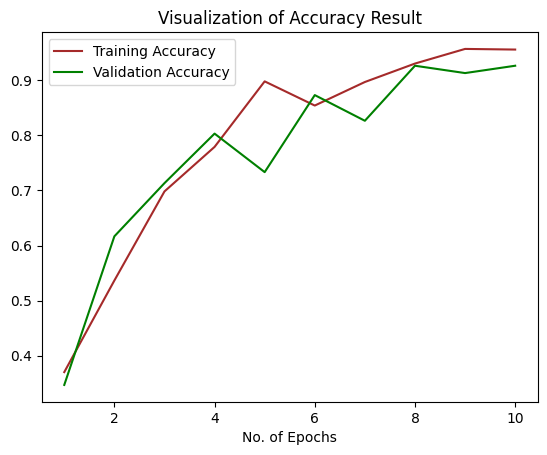

In [18]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()